<a href="https://colab.research.google.com/github/SergeiDBykov/kitchenware-classification/blob/master/Kitchen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Folder organisation

In this section I reorganize our images into subfolders so that `tf.keras.utils.image_dataset_from_directory` can read classes appropriately.


Excecute this python code (e.g. in terminal) in your data folder. In the example below your data is in `'kitchenware-classification/images/'`.

After excecuting this code your files would be stored in appropriate folders
`cup/   fork/  glass/ knife/ plate/ spoon/ test/`.

After that you can load the data folder to **Google Drive** and mount it.


```python
import os
import pandas as pd

datapath = 'kitchenware-classification/'

train_labels = pd.read_csv(datapath + '/train.csv', index_col=0)
test_labels = pd.read_csv(datapath+'/test.csv', index_col=0)

for class_name in ['glass', 'cup', 'spoon', 'plate', 'knife', 'fork', 'test']:
  os.mkdir(datapath+'/images/'+class_name)


image_names={}

for dir in os.walk(datapath + '/images'):
    curr_images = dir[2]
    for image in curr_images:
        id = int(image.split('.')[0])
        label = train_labels.label.get(id, 'test')
        newname = image.split('.')[0]+'_'+label+'.png'
        image_names[image] = newname



for orig_name, new_name in image_names.items():
  label = new_name.split('_')[1].split('.')[0]
  os.rename(datapath+'images/'+orig_name, datapath+'images/'+label+'/'+new_name)


```

_________

# Using Google Drive in Colab

upload folder and csv files on your Google Drive and set appropriate path in the cell below.

 In my case, the root of the project's data is `kitchenware-classification`.

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=False)

#put the path to the directory with .csv files and 'images' folder on your google drive 
datapath = '/content/drive/My Drive/tmp_data_for_colab/kitchenware-classification/' 

Mounted at /content/drive/


In [5]:
print(os.listdir(datapath))
#expected output ['sample_submission.csv', 'train.csv', 'test.csv', 'images']
print(os.listdir(datapath+'/images')[0:10])
#expected output ['spoon', 'glass', 'fork', 'cup', 'test', 'plate', 'knife']
print(os.listdir(datapath+'/images/fork')[0:3])
#expected output ['0106_fork.png', '0063_fork.png', '0125_fork.png']

['train.csv', 'sample_submission.csv', 'test.csv', 'images']
['spoon', 'glass', 'fork', 'cup', 'test', 'plate', 'knife']
['0106_fork.png', '0063_fork.png', '0125_fork.png']


-----

# Part 1: Explore Data

Following [this tensorflow tutorial](https://www.tensorflow.org/tutorials/images/classification)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## load data as tensorflow dataset

In [22]:
batch_size = 32
img_height = 180
img_width = 180

In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  datapath+'images/',
  validation_split=0.2,
  subset="training",
  seed=111,
  image_size=(img_height, img_width),
  batch_size=batch_size)


train_ds = tf.keras.utils.image_dataset_from_directory(
  datapath+'images/',
  validation_split=0.2,
  subset="validation",
  seed=111,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9367 files belonging to 7 classes.
Using 7494 files for training.
Found 9367 files belonging to 7 classes.
Using 1873 files for validation.


In [24]:
class_names = train_ds.class_names
print(class_names)

['cup', 'fork', 'glass', 'knife', 'plate', 'spoon', 'test']


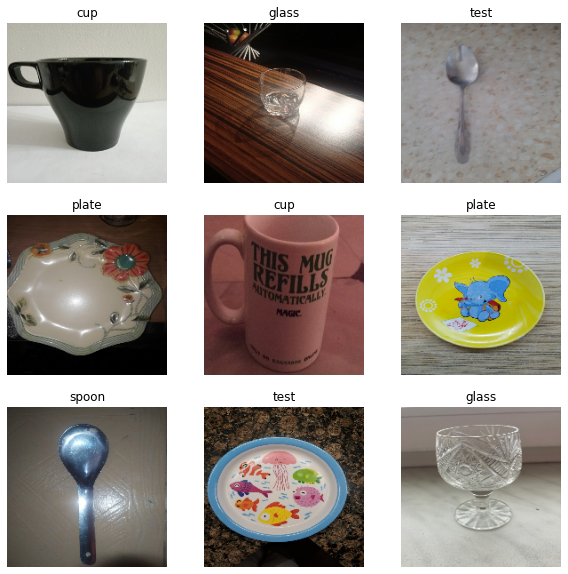

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")